In [0]:
!pip install python-mnist 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
from tensorflow.python.framework.graph_util import convert_variables_to_constants


def freeze_graph(session, keep_var_names = None, output_names = None, clear_devices=True):
    graph = session.graph
    with graph.as_default():
        fvr = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        igf = graph.as_graph_def()
        if clear_devices:
            for node in igf.node:
                node.device=''
        frozen_graph= convert_variables_to_constants(session, igf, output_names, fvr)
        return frozen_graph

In [0]:
#import tensorflow as tf

#from fg import freeze_graph

import numpy as np
from mnist import MNIST


In [0]:
mndata = MNIST('data')
#This will load the train and test data
X_train, y_train = mndata.load('drive/My Drive/data/emnist-byclass-train-images-idx3-ubyte',
                               'drive/My Drive/data/emnist-byclass-train-labels-idx1-ubyte')
X_test, y_test = mndata.load('drive/My Drive/data/emnist-byclass-test-images-idx3-ubyte',
                             'drive/My Drive/data/emnist-byclass-test-labels-idx1-ubyte')

# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)



In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
print( X_train.shape)
print (X_test.shape)


(697932, 28, 28)
(116323, 28, 28)


<function matplotlib.pyplot.show>

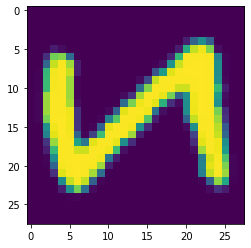

In [0]:
from matplotlib import pyplot as plt
#Display a random image
plt.imshow(X_train[0])
plt.show


In [0]:
#we can see how an image array looks like. all float values b/w 0 and 1 
m = X_train[2]
print(m)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

<function matplotlib.pyplot.show>

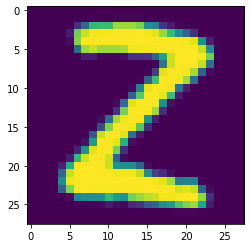

In [0]:
# ### Now we perform Image preprocessing. We reverse and rotate all train and test images

#for train data
for t in range(697932):
    X_train[t]=np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[0])
plt.show


Process Complete: Rotated and reversed test and train images!


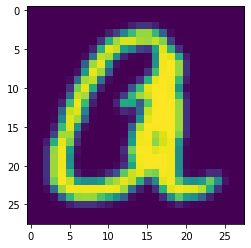

In [0]:
 #for test data  
for t in range(116323):
    X_test[t]=np.transpose(X_test[t])

#checking
plt.imshow(X_test[1])
plt.show

print('Process Complete: Rotated and reversed test and train images!')



<function matplotlib.pyplot.show>

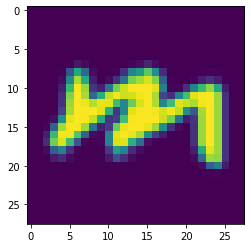

In [0]:

#Checking the last train image, just to be sure!
m = X_train[697931]
plt.imshow(m)
plt.show



In [0]:
# ### Reshaping train and test data again for input into model
#The last number is 1, which signifies that the images are greyscale
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

print (X_train.reshape)
print (X_test.reshape)

<built-in method reshape of numpy.ndarray object at 0x7f111ebaf440>
<built-in method reshape of numpy.ndarray object at 0x7f111f05e7b0>


In [0]:
# ### Creation of model


from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)

#one-hot encode target column
train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)


K.set_learning_phase(1)


Using TensorFlow backend.


In [0]:
model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))

#add the layer below for an accuracy of 89%.(Training time - over 20 hours)
#model.add(Convolution2D(32, (5,5), input_shape=(28,28,1),activation='relu',padding='same',kernel_constraint=maxnorm(3))) #removed
model.add(Convolution2D(32, (5,5),activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2))) #added
#model.add(Dropout(0.25))#added
model.add(Convolution2D(64, (5,5),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.3))#added
#model.add(Convolution2D(64, (5,5),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))#added
#model.add(MaxPooling2D(pool_size=(2,2))) #added

model.add(Dropout(0.4))#added
model.add(Flatten())

#model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))

model.add(Dropout(0.5))

model.add(Dense(62, activation='softmax'))

#opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#opt = optimizers.Adadelta()
opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
#compile model using accuracy to measure model performance
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])









In [0]:
 ### Training of model and evaluation

# In[ ]:


print(model.summary())
#parameters: training data (train_X), target data (train_y), validation data, and the number of epochs.
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=15)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

In [0]:
#evaluating model on test data. will take time
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 86.31%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


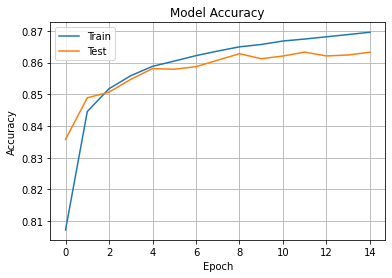

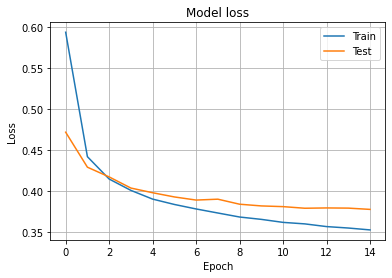

In [0]:
# ## Creating model history graphs

# In[ ]:


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()


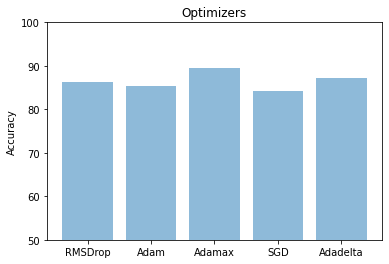

In [0]:
objects = ('RMSDrop', 'Adam', 'Adamax', 'SGD', 'Adadelta')
y_pos = np.arange(len(objects))
performance = [86.2,85.39,89.53,84.29,87.11]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Optimizers')
plt.ylim(50,100)
plt.show()


In [0]:
frozen_graph = freeze_graph(K.get_session(), output_names=[model.output.op.name])
tf.train.write_graph(frozen_graph,'.','drive/My Drive/Colab Notebook/HCR-N/PBfile89531.pb',as_text=False)
print(model.input.op.name)
print(model.output.op.name)



Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 71 variables.
INFO:tensorflow:Converted 71 variables to const ops.
reshape_3_input
dense_6/Softmax


prediction: [7]


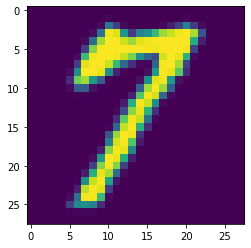

In [0]:
# ## Predicting a single image using the model

# In[ ]:


m = X_test[258].reshape(28,28)
plt.imshow(m)
plt.show
print('prediction: '+str(model.predict_classes(X_test[258].reshape(1,784))))

In [0]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("drive/My Drive/Colab Notebook/HCR-N/model1.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("drive/My Drive/Colab Notebook/HCR-N/model1.h5")
# Creates a HDF5 file 'model.h5'


# # For usage of this model to predict words, open segment.ipynb